In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

file_name_vec = ["P_c_I", "P_c_notI", "P_b_I", "P_b_notI"]
j_file = 3
f_name = file_name_vec[j_file]

In [2]:
df = pd.read_csv("D:/Satellites/28GHz/data/fits/"+f_name+"_slopes.csv")

In [3]:
R_s = df["R_s"]

In [4]:
R_b = df["R_b"]

In [5]:
slope = df["slope"]

In [6]:
intercept = df["intercept"]

In [7]:
x_1 = R_s
x_2 = np.square(R_s)
x_3 = R_b
x_4 = np.square(R_b)

In [8]:
X = np.zeros((4, R_s.size))

In [9]:
X[0] = x_1
X[1] = x_2
X[2] = x_3
X[3] = x_4

X = X.T

In [10]:
y_1 = slope
y_2 = intercept

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg_1 = LinearRegression().fit(X, y_1)
print(reg_1.intercept_, reg_1.coef_ )

0.14354400850331372 [-2.85664342e-06  1.32440531e-08  1.07544088e-05 -2.46306619e-08]


In [13]:
reg_2 = LinearRegression().fit(X, y_2)
print(reg_2.intercept_, reg_2.coef_ )

-2.810706143453921 [-3.22998863e-05  4.74204468e-08 -4.77391318e-05  1.70987716e-07]


In [14]:
def func_surf(x, y, coef, interc):
    X = [x, x*x, y, y*y]
    return coef@X + interc

In [15]:
f_1 = func_surf(x_1, x_3, reg_1.coef_, reg_1.intercept_)
f_2 = func_surf(x_1, x_3, reg_2.coef_, reg_2.intercept_)

Text(0.5, 0, 'R_b')

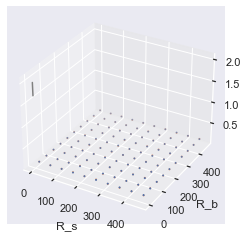

In [16]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(1.7, 2, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(x_1, x_3, f_1, s=1)
ax.scatter3D(x_1, x_3, slope, s=1)
plt.xlabel("R_s")
plt.ylabel("R_b")

Text(0.5, 0, 'R_b')

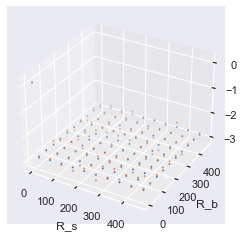

In [17]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0.11, 0.12, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(x_1, x_3, f_2, s=1)
ax.scatter3D(x_1, x_3, intercept, s=1)
plt.xlabel("R_s")
plt.ylabel("R_b")

In [18]:
C_1 = np.array([reg_1.coef_[0], reg_1.coef_[1], reg_1.coef_[2], reg_1.coef_[3], reg_1.intercept_])
C_2 = np.array([reg_2.coef_[0], reg_2.coef_[1], reg_2.coef_[2], reg_2.coef_[3], reg_2.intercept_])

In [19]:
np.savetxt("D:/Satellites/28GHz/data/fits/"+f_name+"_slope_fit.csv", C_1)
np.savetxt("D:/Satellites/28GHz/data/fits/"+f_name+"_intercept_fit.csv", C_2)